# **Song Popularity Regression | fast.ai Tabular**

## I previously did exploratory data analysis on this dataset, check it out:
# [ ✨️ 🎵️ Spotify Top Hits |📊️ EDA ✨️](https://www.kaggle.com/code/shreydan/spotify-top-hits-eda)

### Now let's get to work
___

In [1]:
from fastai.tabular.all import *

In [2]:
df = pd.read_csv('../input/top-hits-spotify-from-20002019/songs_normalize.csv')

In [3]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [4]:
len(df)

2000

# Dropping artist, song, year

In [5]:
df.drop(columns=['artist','song','year'], inplace=True)

In [6]:
df.head(10)

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,211160,False,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,167066,False,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,250546,False,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,224493,False,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,200560,False,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,253733,True,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,284200,True,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,258560,False,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,271333,False,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,307153,False,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


# Getting Genres

In [7]:
def split_genres(genre):
    g = genre.replace(' ','').split(',')
    g = [t for t in g if t!='set()']
    return g

def flatten(t):
    return [item for sublist in t for item in sublist]

def remove_duplicates(l):
    res = []
    l = [res.append(x) for x in l if x not in res]
    return res

all_genres = remove_duplicates(flatten(list(df['genre'].apply(split_genres))))

In [8]:
all_genres

['pop',
 'rock',
 'country',
 'metal',
 'hiphop',
 'R&B',
 'Dance/Electronic',
 'Folk/Acoustic',
 'easylistening',
 'latin',
 'blues',
 'World/Traditional',
 'jazz',
 'classical']

# Creating Empty Cols based on Genre

In [9]:
df[all_genres] = None

In [10]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,hiphop,R&B,Dance/Electronic,Folk/Acoustic,easylistening,latin,blues,World/Traditional,jazz,classical
0,211160,False,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,...,None,None,None,None,None,None,None,None,None,None
1,167066,False,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,...,None,None,None,None,None,None,None,None,None,None
2,250546,False,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,...,None,None,None,None,None,None,None,None,None,None
3,224493,False,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,...,None,None,None,None,None,None,None,None,None,None
4,200560,False,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,...,None,None,None,None,None,None,None,None,None,None


# Filling individual genre cols based on song genre

In [11]:
def get_genre_tuple(genres):
    l = [0 for _ in range(len(all_genres))]
    for i,genre in enumerate(all_genres):
        if genre in genres:
            l[i] = 1
    return pd.Series(l)

df[all_genres] = df['genre'].apply(get_genre_tuple)

In [12]:
df.head()[all_genres]

,pop,rock,country,metal,hiphop,R&B,Dance/Electronic,Folk/Acoustic,easylistening,latin,blues,World/Traditional,jazz,classical
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df.drop(columns=['genre'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   duration_ms        2000 non-null   int64  
 1   explicit           2000 non-null   bool   
 2   popularity         2000 non-null   int64  
 3   danceability       2000 non-null   float64
 4   energy             2000 non-null   float64
 5   key                2000 non-null   int64  
 6   loudness           2000 non-null   float64
 7   mode               2000 non-null   int64  
 8   speechiness        2000 non-null   float64
 9   acousticness       2000 non-null   float64
 10  instrumentalness   2000 non-null   float64
 11  liveness           2000 non-null   float64
 12  valence            2000 non-null   float64
 13  tempo              2000 non-null   float64
 14  pop                2000 non-null   int64  
 15  rock               2000 non-null   int64  
 16  country            2000 

In [15]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,hiphop,R&B,Dance/Electronic,Folk/Acoustic,easylistening,latin,blues,World/Traditional,jazz,classical
0,211160,False,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,...,0,0,0,0,0,0,0,0,0,0
1,167066,False,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,...,0,0,0,0,0,0,0,0,0,0
2,250546,False,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,...,0,0,0,0,0,0,0,0,0,0
3,224493,False,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,...,0,0,0,0,0,0,0,0,0,0
4,200560,False,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,...,0,0,0,0,0,0,0,0,0,0


# Continuous and Categorial Cols
### Using `cont_cat_split()` via fastai
### Removing `popularity` from continuous cols since its the dependent col

In [16]:
cont, cat = cont_cat_split(df)
cont = [_ for _ in cont if _!='popularity']
cont, cat

(['duration_ms',
  'danceability',
  'energy',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo'],
 ['explicit',
  'key',
  'mode',
  'pop',
  'rock',
  'country',
  'metal',
  'hiphop',
  'R&B',
  'Dance/Electronic',
  'Folk/Acoustic',
  'easylistening',
  'latin',
  'blues',
  'World/Traditional',
  'jazz',
  'classical'])

# `bool` -> `uint8` otherwise causes bug
#### See: [forums](https://forums.fast.ai/t/cant-convert-np-ndarray-of-type-numpy-object-while-doing-inference-with-my-tabular-learner/88927/2)

In [17]:
df['explicit'] = df['explicit'].astype('uint8')

# Preprocessing: Categorify and Normalization

In [18]:
procs = [Categorify, Normalize]

# Dataloaders

In [19]:
dls = TabularDataLoaders.from_df(df, 
                                 cat_names=cat, 
                                 cont_names=cont,
                                 procs=procs,
                                 y_names='popularity',
                                 y_block=RegressionBlock,
                                )

In [20]:
dls.show_batch()

,explicit,key,mode,pop,rock,country,metal,hiphop,R&B,Dance/Electronic,Folk/Acoustic,easylistening,latin,blues,World/Traditional,jazz,classical,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,189506.000832,0.345,0.0581,-17.216999,0.0374,0.976000,3.659998e-04,0.1030,0.304,174.117002,65.0
1,0,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,231145.999970,0.687,0.7710,-4.424000,0.0384,0.164000,2.459957e-05,0.1120,0.445,129.964004,55.0
2,0,8,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,199852.999596,0.764,0.7510,-3.740000,0.0703,0.005540,2.370001e-04,0.1640,0.418,91.976997,64.0
3,0,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,230192.000010,0.621,0.8200,-4.865000,0.0367,0.332000,-3.871216e-10,0.1040,0.452,144.904998,75.0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,197159.999792,0.534,0.2470,-15.635999,0.0322,0.516000,8.590000e-03,0.1220,0.344,82.168001,60.0
5,1,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,238425.999931,0.736,0.7610,-5.449000,0.0338,0.096600,-3.871216e-10,0.0823,0.114,119.999001,66.0
6,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,295345.999040,0.814,0.8520,-6.176000,0.4010,0.095800,1.319980e-06,0.0288,0.717,184.682007,51.0
7,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,266065.999052,0.892,0.6280,-3.832000,0.2160,0.169000,-3.871216e-10,0.1020,0.676,92.063004,39.0
8,0,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,294600.001194,0.320,0.8800,-6.035000,0.0504,0.000101,4.309747e-06,0.0760,0.257,146.348998,69.0
9,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,284386.002327,0.824,0.7330,-5.474000,0.0613,0.036200,-3.871216e-10,0.3250,0.395,97.972000,75.0


# Learner

In [21]:
learner = tabular_learner(dls,metrics=[rmse])

SuggestedLRs(valley=0.12022644281387329)

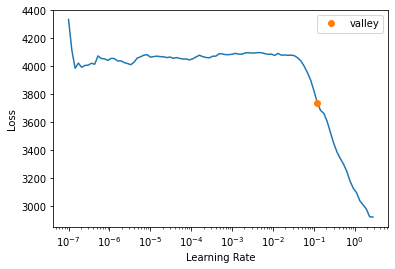

In [22]:
learner.lr_find()

In [23]:
learner.fit_one_cycle(25,0.1,cbs=[EarlyStoppingCallback(monitor='valid_loss',patience=1)])

epoch,train_loss,valid_loss,_rmse,time
0,4015.977295,3697.332764,60.805698,00:00
1,3302.868896,1030.576294,32.102589,00:00
2,1965.874390,522.122681,22.850004,00:00
3,1286.536255,533.884583,23.105942,00:00


No improvement since epoch 2: early stopping


# Prediction Results
### Compare `popularity` and `popularity_pred` cols

In [24]:
learner.show_results()

,explicit,key,mode,pop,rock,country,metal,hiphop,R&B,Dance/Electronic,Folk/Acoustic,easylistening,latin,blues,World/Traditional,jazz,classical,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,popularity_pred
0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.218309,0.891192,0.904245,0.897230,-0.729556,0.803052,-0.169284,-0.349820,1.886603,0.394191,69.0,68.356918
1,1.0,10.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.632065,0.411328,1.048428,0.836170,-0.668317,0.435864,-0.173206,-0.527856,0.592568,-0.349351,62.0,62.071083
2,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.219525,0.841057,-0.701430,-0.541312,-0.478372,-0.711396,-0.173206,-0.948021,0.867894,-0.578558,43.0,48.667858
3,1.0,9.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.784713,-0.684482,-0.367188,0.220909,-0.826086,-0.117833,-0.173183,-0.620435,-0.944672,-0.536731,53.0,54.957848
4,1.0,12.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.029066,-0.168807,0.923906,0.388566,-0.072532,-0.209339,-0.173206,0.070344,1.124866,0.023392,35.0,62.709408
5,2.0,10.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.557750,0.955651,0.419266,0.376147,1.074405,0.068675,-0.173206,-0.421035,-0.540860,-0.723925,77.0,53.536472
6,1.0,7.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.086218,-0.433807,0.504464,0.215216,-0.625761,-0.318329,-0.173206,-0.186027,-0.238001,-0.987633,0.0,58.749111
7,2.0,10.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.152028,1.363894,-0.629339,0.659198,0.275182,-0.574778,-0.173206,-0.914550,0.721054,-0.646401,59.0,48.227554
8,2.0,8.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.635641,-0.175969,-1.337146,-2.334833,-0.240680,-0.709414,-0.173191,-0.171784,-0.407785,1.885162,61.0,49.790379


___

# Upvote if you like my work, follow [@shreydan](https://kaggle.com/shreydan)